# 2. Reproduce the original model

In [1]:
%matplotlib inline 
from IPython.display import display, HTML
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import pandas as pd
import seaborn as sns
sns.set(style='ticks', rc={'axes.grid':True,
                           'xtick.labelsize': 'medium',
                           'ytick.labelsize': 'medium',
#                            'font.size': 15,
                          })

analysis_dir = os.getcwd()
assert analysis_dir.endswith(os.path.join('em-2020','analysis'))
plot_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'tex', 'plots'))
data_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'data'))

Failed to set matplotlib backnd inline: No module named 'matplotlib'


In [2]:
suppressMessages({
library(lavaan)
library(semPlot)
library(semTools)
library(MVN)
library(Hmisc)
})

In [3]:
%get data_dir --from em-2020
data.raw <- read.csv(file.path(data_dir, 'WB_BGD_201805.csv'))
data <- subset(data.raw, year >= 1986 & year <= 2015)
head(data)

data.log <- cbind(data.raw['year'], log(subset(data.raw, select=-year)))
data.log <- subset(data.log, year >= 1986 & year <= 2015)
head(data.log)


# data.logdiff <- diff(as.matrix(log(data.raw)))
data.logdiff <- cbind(data.raw[-1,'year', drop=FALSE], diff(as.matrix(log(subset(data.raw, select=-year)))))
data.logdiff <- subset(data.logdiff, year >= 1986 & year <= 2015)
head(data.logdiff)


,year,ISG,TO,P_GDP,P_GDPb,EI,EIb,TI
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27,1986,20.83050,17.01874,227.4230,NA,0.4893292,NA,93
28,1987,20.05066,16.68780,247.0723,NA,0.4316770,NA,121
29,1988,20.41723,17.67806,263.2228,NA,0.4336869,NA,133
30,1989,20.28788,18.32517,277.8178,NA,0.4204187,NA,108
31,1990,20.69696,18.96650,297.5680,832.4341,0.4031165,0.144101,108
32,1991,21.73820,18.88983,284.7256,869.3353,0.4055741,0.132834,113


,year,ISG,TO,P_GDP,P_GDPb,EI,EIb,TI
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27,1986,3.036418,2.834315,5.426812,NA,-0.7147197,NA,4.532599
28,1987,2.998262,2.814678,5.509681,NA,-0.8400777,NA,4.795791
29,1988,3.016379,2.872325,5.573001,NA,-0.8354325,NA,4.890349
30,1989,3.010024,2.908276,5.626966,NA,-0.8665041,NA,4.682131
31,1990,3.029987,2.942674,5.695643,6.724354,-0.9085296,-1.937241,4.682131
32,1991,3.079071,2.938624,5.651526,6.767729,-0.9024517,-2.018655,4.727388


,year,ISG,TO,P_GDP,P_GDPb,EI,EIb,TI
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27,1986,0.001931049,-0.068324550,-0.04981581,NA,0.091231674,NA,-0.38005539
28,1987,-0.038156253,-0.019637466,0.08286922,NA,-0.125357979,NA,0.26319105
29,1988,0.018117113,0.057646795,0.06331973,NA,0.004645233,NA,0.09455858
30,1989,-0.006355320,0.035951178,0.05396486,NA,-0.031071599,NA,-0.20821790
31,1990,0.019963260,0.034398627,0.06867711,NA,-0.042025491,NA,0.00000000
32,1991,0.049084326,-0.004050854,-0.04411684,0.04337489,0.006077858,-0.08141388,0.04525659


In [4]:
summary(data)
order = c('ISG', 'TO', 'TI', 'P_GDP', 'EI')
cor(data, use='pairwise')[order, order]

      year           ISG              TO            P_GDP       
 Min.   :1986   Min.   :20.05   Min.   :16.69   Min.   : 227.4  
 1st Qu.:1993   1st Qu.:22.86   1st Qu.:22.93   1st Qu.: 293.2  
 Median :2000   Median :23.92   Median :28.30   Median : 401.6  
 Mean   :2000   Mean   :24.07   Mean   :30.56   Mean   : 498.8  
 3rd Qu.:2008   3rd Qu.:25.90   3rd Qu.:39.48   3rd Qu.: 597.1  
 Max.   :2015   Max.   :28.15   Max.   :48.11   Max.   :1210.2  
                                                                
     P_GDPb             EI              EIb                TI       
 Min.   : 832.4   Min.   :0.2049   Min.   :0.07095   Min.   : 93.0  
 1st Qu.:1103.1   1st Qu.:0.3205   1st Qu.:0.08379   1st Qu.:138.0  
 Median :1455.7   Median :0.3463   Median :0.10541   Median :291.0  
 Mean   :1715.4   Mean   :0.3513   Mean   :0.10391   Mean   :239.2  
 3rd Qu.:2239.5   3rd Qu.:0.4179   3rd Qu.:0.12078   3rd Qu.:317.5  
 Max.   :3335.8   Max.   :0.4893   Max.   :0.14410   Max.   :354.0

,ISG,TO,TI,P_GDP,EI
ISG,1.0000000,0.9327355,0.7972720,0.8715645,-0.8552086
TO,0.9327355,1.0000000,0.8417575,0.8757430,-0.9187085
TI,0.7972720,0.8417575,1.0000000,0.6928933,-0.7820815
P_GDP,0.8715645,0.8757430,0.6928933,1.0000000,-0.9492223
EI,-0.8552086,-0.9187085,-0.7820815,-0.9492223,1.0000000


In [5]:
summary(lm('TI ~ ISG', data=data.log))


Call:
lm(formula = "TI ~ ISG", data = data.log)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68860 -0.15671  0.02306  0.12760  0.48305 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6.9097     1.7183  -4.021 0.000397 ***
ISG           3.8706     0.5407   7.158 8.64e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2792 on 28 degrees of freedom
Multiple R-squared:  0.6466,	Adjusted R-squared:  0.634 
F-statistic: 51.24 on 1 and 28 DF,  p-value: 8.642e-08


In [6]:
summary(lm('P_GDP ~ TO', data=data.log))


Call:
lm(formula = "P_GDP ~ TO", data = data.log)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29925 -0.12188  0.00087  0.11016  0.52068 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.79647    0.33615   5.344 1.08e-05 ***
TO           1.27854    0.09938  12.865 2.83e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1797 on 28 degrees of freedom
Multiple R-squared:  0.8553,	Adjusted R-squared:  0.8501 
F-statistic: 165.5 on 1 and 28 DF,  p-value: 2.834e-13


In [7]:
summary(lm('EI ~ ISG + TO + TI + P_GDP', data=data.log))


Call:
lm(formula = "EI ~ ISG + TO + TI + P_GDP", data = data.log)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05058 -0.01766  0.00164  0.01890  0.05243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.38449    0.43939   3.151  0.00432 ** 
ISG          0.30369    0.18454   1.646  0.11287    
TO           0.05433    0.07902   0.688  0.49834    
TI           0.03439    0.02427   1.417  0.16945    
P_GDP       -0.62350    0.03685 -16.919 7.68e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02855 on 24 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9852,	Adjusted R-squared:  0.9827 
F-statistic: 399.2 on 4 and 24 DF,  p-value: < 2.2e-16


In [8]:
model.path <- '
## path model
EI ~ p_ei_isg*ISG + p_ei_to*TO + p_ei_ti*TI + p_ei_pgdp*P_GDP
TI ~ p_ti_isg*ISG
P_GDP ~ p_pgdp_to*TO
## indirect effect
p_ei_ti_isg := p_ei_ti*p_ti_isg
p_ei_pgdp_to := p_ei_pgdp*p_pgdp_to
## total effect
p_ei_isg_total := p_ei_isg + (p_ei_ti*p_ti_isg)
p_ei_to_total := p_ei_to + (p_ei_pgdp*p_pgdp_to)
'

capture <- function(expr, file) {
    writeLines(c('\\begin{verbatim}', 
                 capture.output(expr),
                 '\\end{verbatim}'), con=file)
}
model.path.fit <- sem(model.path, data=data.log, estimator='MLR', missing='FIML', meanstructure=TRUE)
capture(summary(model.path.fit, standardized=TRUE, header=TRUE,  fit.measures=TRUE, estimates=FALSE),
        '../tex/plots/model.path.fit.summary.tex')
capture(summary(model.path.fit, standardized=TRUE, header=FALSE, estimates=TRUE),
        '../tex/plots/model.path.fit.estimates.tex')
summary(model.path.fit, standardized=TRUE, fit.measures=TRUE)

Warning message in lav_model_hessian(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
“lavaan WARNING: Hessian is not fully symmetric. Max diff = 1.06448313451218e-05”


lavaan 0.6-5 ended normally after 64 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         12
                                                      
  Number of observations                            30
  Number of missing patterns                         2
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                                14.849      14.804
  Degrees of freedom                                 3           3
  P-value (Chi-square)                           0.002       0.002
  Scaling correction factor                                  1.003
    for the Yuan-Bentler correction (Mplus variant) 

Model Test Baseline Model:

  Test statistic                               226.218     233.615
  Degrees of freedom                                 9     

In [9]:
soln.std <- as.data.frame(standardizedSolution(model.path.fit, se=TRUE, type='std.all', remove.def=FALSE))
r.square <- lavInspect(model.path.fit, 'rsquare')
n.x <- 3

In [10]:
%get soln.std --from R
%get r.square --from R
display(np.round(soln_std, 3))
display(r_square)

Variable soln.std is put to SoS as soln_std
Variable r.square is put to SoS as r_square


,lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
0,EI,~,ISG,0.122,0.048,2.517,0.012,0.027,0.217
1,EI,~,TO,0.076,0.082,0.930,0.352,-0.084,0.237
2,EI,~,TI,0.066,0.043,1.531,0.126,-0.019,0.151
3,EI,~,P_GDP,-1.211,0.044,-27.661,0.000,-1.297,-1.125
4,TI,~,ISG,0.804,0.046,17.359,0.000,0.713,0.895
5,P_GDP,~,TO,0.925,0.016,56.822,0.000,0.893,0.957
6,EI,~~,EI,0.012,0.004,3.269,0.001,0.005,0.020
7,TI,~~,TI,0.353,0.075,4.743,0.000,0.207,0.499
8,P_GDP,~~,P_GDP,0.145,0.030,4.807,0.000,0.086,0.204
9,ISG,~~,ISG,1.000,0.000,NaN,NaN,1.000,1.000


EI       0.987780
TI       0.646638
P_GDP    0.855302
dtype: float64

In [11]:
df = soln_std.query('(lhs != rhs) & (op == "~")').copy()
df.index = np.where(df.op == '~', df.lhs.str.cat([df.op, df.rhs], sep=' '), df.lhs)
df = df.loc[['TI ~ ISG', 'P_GDP ~ TO', 'EI ~ ISG', 'EI ~ TO', 'EI ~ TI', 'EI ~ P_GDP']]
df['Equation'] = ['1', '2', '3', '', '', '']
df['Dep. var.'] = df.lhs.str.replace('P_GDP', r'P\_GDP')
df['Ind. var.'] = df.rhs.str.replace('P_GDP', r'P\_GDP')
df['Coefficient'] = ('$P_{' + df.lhs + ',' + df.rhs + '}$').str.replace('P_GDP', r'P\_GDP')
df['Est. (std.)'] = np.round(df['est.std'],3)
df['S.E. (std.)'] = np.round(df['se'],3)
df['p-value'] = ['{:.3f}'.format(x) if x >= 0.001 else '*' for x in df['pvalue']]
df['$R^{2}$'] = ''
df['$R^{2}$'].iloc[0:3] = ['{:.3f}'.format(x) for x in r_square.loc[['TI', 'P_GDP', 'EI']]]
df = df[['Equation', 
         'Dep. var.', 'Ind. var.', 
         'Coefficient', 'Est. (std.)', 'S.E. (std.)', 'p-value', '$R^{2}$']]
display(df)
print(df.to_latex(escape=False, index=False))

/home/drake/.virtualenvs/em-2020/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Equation,Dep. var.,Ind. var.,Coefficient,Est. (std.),S.E. (std.),p-value,$R^{2}$
TI ~ ISG,1,TI,ISG,"$P_{TI,ISG}$",0.804,0.046,*,0.647
P_GDP ~ TO,2,P\_GDP,TO,"$P_{P\_GDP,TO}$",0.925,0.016,*,0.855
EI ~ ISG,3,EI,ISG,"$P_{EI,ISG}$",0.122,0.048,0.012,0.988
EI ~ TO,,EI,TO,"$P_{EI,TO}$",0.076,0.082,0.352,
EI ~ TI,,EI,TI,"$P_{EI,TI}$",0.066,0.043,0.126,
EI ~ P_GDP,,EI,P\_GDP,"$P_{EI,P\_GDP}$",-1.211,0.044,*,


\begin{tabular}{llllrrll}
\toprule
Equation & Dep. var. & Ind. var. &      Coefficient &  Est. (std.) &  S.E. (std.) & p-value & $R^{2}$ \\
\midrule
       1 &        TI &       ISG &     $P_{TI,ISG}$ &        0.804 &        0.046 &       * &   0.647 \\
       2 &    P\_GDP &        TO &  $P_{P\_GDP,TO}$ &        0.925 &        0.016 &       * &   0.855 \\
       3 &        EI &       ISG &     $P_{EI,ISG}$ &        0.122 &        0.048 &   0.012 &   0.988 \\
         &        EI &        TO &      $P_{EI,TO}$ &        0.076 &        0.082 &   0.352 &         \\
         &        EI &        TI &      $P_{EI,TI}$ &        0.066 &        0.043 &   0.126 &         \\
         &        EI &    P\_GDP &  $P_{EI,P\_GDP}$ &       -1.211 &        0.044 &       * &         \\
\bottomrule
\end{tabular}



In [12]:
df = soln_std.query('(lhs != rhs) & (op in ["~", ":="])').copy()
df.index = np.where(df.op == '~', df.lhs.str.cat([df.op, df.rhs], sep=' '), df.lhs)
display(np.round(df, 3))
out = pd.DataFrame({'Causal variable': ['ISG', 'TO', 'TI', 'P\_GDP'], 
                    'DE coeff.': np.nan, 'DE s.e.': np.nan, 'DE p-value': np.nan,
                    'IE coeff.': np.nan, 'IE s.e.': np.nan, 'IE p-value': np.nan,
                    'TE coeff.': np.nan, 'TE s.e.': np.nan, 'TE p-value': np.nan})
out.iloc[0:4, 1:4] = df.iloc[0:4, [3,4,6]].values
out.iloc[0:2, 4:7] = df.iloc[6:8, [3,4,6]].values
out.iloc[0:2, 7:10] = df.iloc[8:10, [3,4,6]].values
out.iloc[2:4, 7:10] = df.iloc[2:4, [3,4,6]].values
f3 = lambda x: '{:.3f}'.format(x) if np.isfinite(x) else ''
out.iloc[:, [1,2,4,5,7,8]] = out.iloc[:, [1,2,4,5,7,8]].applymap(f3)
f3p = lambda x: '{:.3f}'.format(x) if x >= 0.001 else '*' if np.isfinite(x) else ''
out.iloc[:, [3,6,9]] = out.iloc[:, [3,6,9]].applymap(f3p)
display(out)
print(out.to_latex(escape=False, index=False))

,lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
EI ~ ISG,EI,~,ISG,0.122,0.048,2.517,0.012,0.027,0.217
EI ~ TO,EI,~,TO,0.076,0.082,0.930,0.352,-0.084,0.237
EI ~ TI,EI,~,TI,0.066,0.043,1.531,0.126,-0.019,0.151
EI ~ P_GDP,EI,~,P_GDP,-1.211,0.044,-27.661,0.000,-1.297,-1.125
TI ~ ISG,TI,~,ISG,0.804,0.046,17.359,0.000,0.713,0.895
P_GDP ~ TO,P_GDP,~,TO,0.925,0.016,56.822,0.000,0.893,0.957
p_ei_ti_isg,p_ei_ti_isg,:=,p_ei_ti*p_ti_isg,0.053,0.035,1.524,0.128,-0.015,0.122
p_ei_pgdp_to,p_ei_pgdp_to,:=,p_ei_pgdp*p_pgdp_to,-1.120,0.046,-24.433,0.000,-1.210,-1.030
p_ei_isg_total,p_ei_isg_total,:=,p_ei_isg+(p_ei_ti*p_ti_isg),0.175,0.066,2.662,0.008,0.046,0.304
p_ei_to_total,p_ei_to_total,:=,p_ei_to+(p_ei_pgdp*p_pgdp_to),-1.044,0.072,-14.407,0.000,-1.186,-0.902


,Causal variable,DE coeff.,DE s.e.,DE p-value,IE coeff.,IE s.e.,IE p-value,TE coeff.,TE s.e.,TE p-value
0,ISG,0.122,0.048,0.012,0.053,0.035,0.128,0.175,0.066,0.008
1,TO,0.076,0.082,0.352,-1.120,0.046,*,-1.044,0.072,*
2,TI,0.066,0.043,0.126,,,,0.066,0.043,0.126
3,P\_GDP,-1.211,0.044,*,,,,-1.211,0.044,*


\begin{tabular}{llllllllll}
\toprule
Causal variable & DE coeff. & DE s.e. & DE p-value & IE coeff. & IE s.e. & IE p-value & TE coeff. & TE s.e. & TE p-value \\
\midrule
            ISG &     0.122 &   0.048 &      0.012 &     0.053 &   0.035 &      0.128 &     0.175 &   0.066 &      0.008 \\
             TO &     0.076 &   0.082 &      0.352 &    -1.120 &   0.046 &          * &    -1.044 &   0.072 &          * \\
             TI &     0.066 &   0.043 &      0.126 &           &         &            &     0.066 &   0.043 &      0.126 \\
         P\_GDP &    -1.211 &   0.044 &          * &           &         &            &    -1.211 &   0.044 &          * \\
\bottomrule
\end{tabular}



      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-9.724e-02 -4.000e-08  1.000e-08  6.280e-03  8.521e-03  1.155e-01 

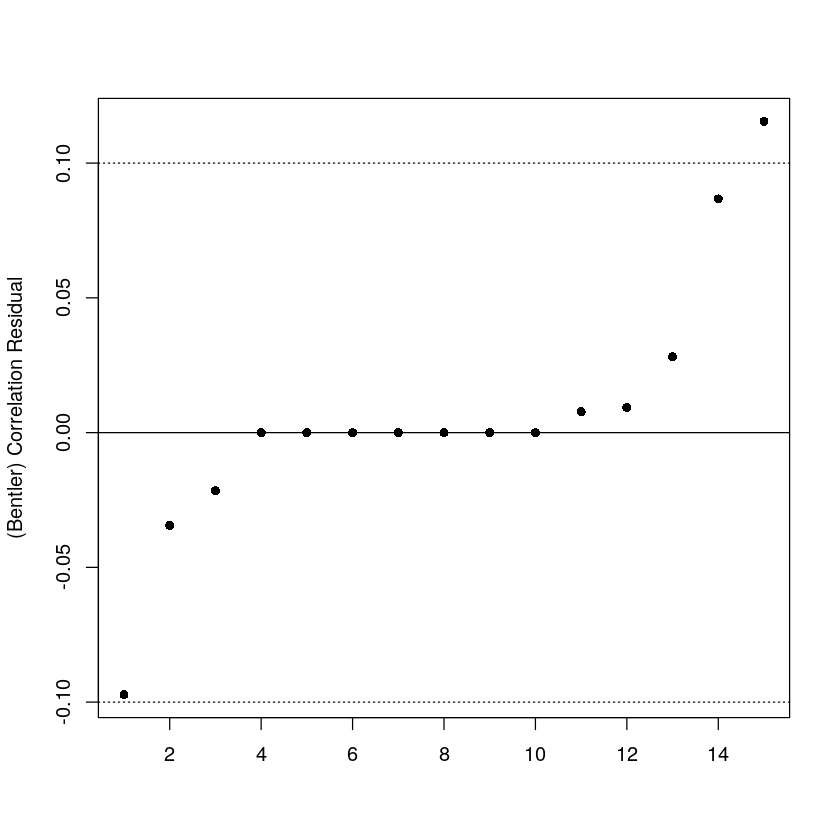

In [13]:
# Extract unique correlation residuals
model.path.fit.resid <- as.data.frame(resid(model.path.fit, type='cor.bentler')$cov)
resid <- model.path.fit.resid[lower.tri(model.path.fit.resid, diag=TRUE)]

summary(resid)

plot(resid[order(resid)], pch=16, xlab='', ylab='(Bentler) Correlation Residual')
abline(h=c(0, -.1, .1), lty=c(1,3,3))

In [14]:
%get model.path.fit.resid --from R
def plot_corr_resid(corr, figsize=None, **kwargs):
    mask = 1 - np.tril(np.ones_like(corr, dtype=np.bool))
    corr_text = np.vectorize('{:.3f}'.format)(corr)
    if figsize is None:
        figsize=np.array([1, 0.75]) * corr.shape[0] + np.array([kwargs.get('cbar', True) * 1.5, 0])
    f, ax = plt.subplots(figsize=figsize)
    cmap = sns.diverging_palette(10, 10, s=50, l=75, sep=100, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=corr_text, fmt='', mask=mask, cmap=cmap, vmin=-0.1, vmax=0.1, 
                square=False, linewidths=.25, **kwargs)
    ax.set_yticklabels(ax.get_yticklabels(), fontdict={'verticalalignment': 'center'})

def save_fig(file, **kwargs):
    path = os.path.join(plot_dir, file)
    plt.savefig(path, metadata={'CreationDate': None})

Variable model.path.fit.resid is put to SoS as model_path_fit_resid


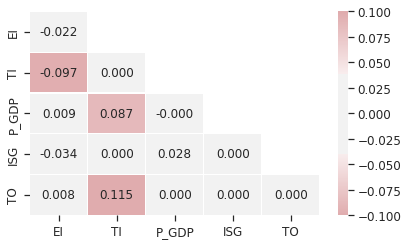

In [15]:
plot_corr_resid(model_path_fit_resid)
save_fig('original_correlation_residuals.pdf')


Call:
lm(formula = data.log$P_GDP ~ residuals_lavaan(model.path.fit)$P_GDP)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.70521 -0.29896 -0.02997  0.39565  0.64854 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                             6.10035    0.07975  76.491   <2e-16 ***
residuals_lavaan(model.path.fit)$P_GDP  1.00000    0.45946   2.176   0.0381 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4368 on 28 degrees of freedom
Multiple R-squared:  0.1447,	Adjusted R-squared:  0.1142 
F-statistic: 4.737 on 1 and 28 DF,  p-value: 0.03811


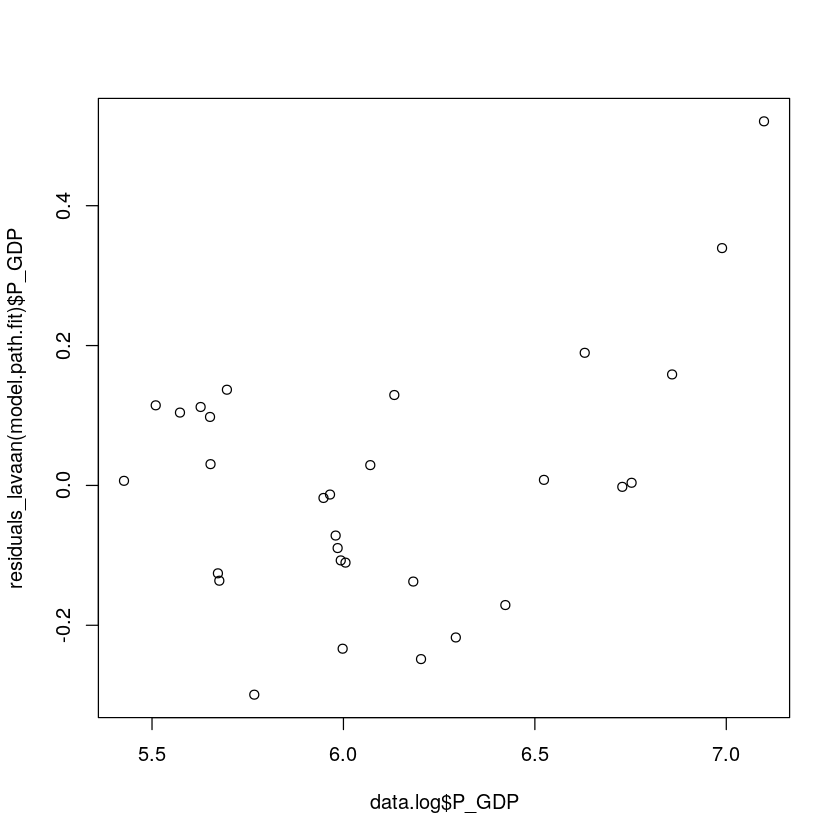

In [16]:
summary(lm(data.log$P_GDP ~ residuals_lavaan(model.path.fit)$P_GDP))
plot(data.log$P_GDP, residuals_lavaan(model.path.fit)$P_GDP)